## Keras Sample Codes for CNN and RNN
![alt text](https://blog.keras.io/img/keras-tensorflow-logo.jpg "Keras with Tensorflow")

***
## 1) MNIST Data

### Load the data

In [4]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [205]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

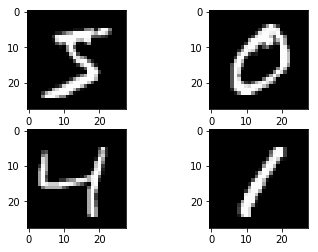

In [209]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

### Data Preparation

In [36]:
import numpy as np # for data preparation
from keras.utils import np_utils # for one hot encoding
from keras.datasets import mnist

In [37]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [38]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

The training dataset is structured as a 3-dimensional array of instance, image width and image height. For a multi-layer perceptron model we must reduce the images down into a vector of pixels. In this case the 28×28 sized images will be 784 pixel input values.

In [39]:
# flatten 28 x 28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [40]:
# normalize inputs from 0-255 to 0-1
# It is almost always a good idea to perform some scaling of input values when using neural network models
X_train = X_train / 255
X_test = X_test / 255

Finally, the output variable is an integer from 0 to 9. This is a multi-class classification problem. As such, it is good practice to use a one hot encoding of the class values, transforming the vector of class integers into a binary matrix.

We can easily do this using the built-in np_utils.to_categorical() helper function in Keras.

In [41]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

### Baseline Model with Multi-Layer Perceptrons

In [42]:
from keras.layers import Dropout, Dense
from keras.models import Sequential

In [43]:
def baseline_model():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim = num_pixels, activation = 'relu', kernel_initializer = 'normal')) # one hidden layer with 784 neurons
    model.add(Dense(num_classes, activation = 'softmax', kernel_initializer = 'normal')) # output layer with 10 classes
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return(model)

We will fit the model over 10 epochs with updates every 200 images

In [52]:
model = baseline_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 10, batch_size = 200)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s - loss: 0.2964 - acc: 0.9177 - val_loss: 0.1284 - val_acc: 0.9618
Epoch 2/10
60000/60000 [==============================] - 5s - loss: 0.1045 - acc: 0.9680 - val_loss: 0.0889 - val_acc: 0.9705
Epoch 3/10
60000/60000 [==============================] - 5s - loss: 0.0644 - acc: 0.9802 - val_loss: 0.0825 - val_acc: 0.9766
Epoch 4/10
60000/60000 [==============================] - 5s - loss: 0.0458 - acc: 0.9859 - val_loss: 0.0686 - val_acc: 0.9796
Epoch 5/10
60000/60000 [==============================] - 5s - loss: 0.0322 - acc: 0.9903 - val_loss: 0.0700 - val_acc: 0.9785
Epoch 6/10
60000/60000 [==============================] - 5s - loss: 0.0217 - acc: 0.9941 - val_loss: 0.0640 - val_acc: 0.9801
Epoch 7/10
60000/60000 [==============================] - 5s - loss: 0.0170 - acc: 0.9948 - val_loss: 0.0682 - val_acc: 0.9799
Epoch 8/10
60000/60000 [==============================] - 5s 

In [53]:
scores = model.evaluate(X_test, y_test, verbose = 0)
print('Loss: ' + str(scores[0])) # loss
print('Accuracy: ' + str(scores[1])) # accuracy

Loss: 0.0705060733277
Accuracy: 0.9804


### Simple Convolutional Neural Network 

In [78]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

In [79]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In Keras, the layers used for two-dimensional convolutions expect pixel values with the dimensions [pixels][width][height].

In the case of RGB, the first dimension pixels would be 3 for the red, green and blue components and it would be like having 3 image inputs for every color image. In the case of MNIST where the pixel values are gray scale, the pixel dimension is set to 1.

In [153]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [154]:
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [155]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [156]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [157]:
X_train.shape

(60000, 1, 28, 28)

**Architecture**: 
 1. The first hidden layer is a convolutional layer called a Convolution2D. The layer has 32 feature maps, which with the size of 5×5 and a rectifier activation function. This is the input layer, expecting images with the structure outline above [pixels][width][height].
 2. Next we define a pooling layer that takes the max called MaxPooling2D. It is configured with a pool size of 2×2.
 3. The next layer is a regularization layer using dropout called Dropout. It is configured to randomly exclude 20% of neurons in the layer in order to reduce overfitting.
 4. Next is a layer that converts the 2D matrix data to a vector called Flatten. It allows the output to be processed by standard fully connected layers.
 5. Next a fully connected layer with 128 neurons and rectifier activation function.
 6. Finally, the output layer has 10 neurons for the 10 classes and a softmax activation function to output probability-like predictions for each class.

As before, the model is trained using logarithmic loss and the ADAM gradient descent algorithm.

In [87]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape = (1, 28, 28), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(num_classes, activation = 'softmax'))
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return(model)

In [88]:
model = baseline_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 10, batch_size = 200, verbose = 2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
76s - loss: 0.2447 - acc: 0.9282 - val_loss: 0.0813 - val_acc: 0.9753
Epoch 2/10
70s - loss: 0.0727 - acc: 0.9786 - val_loss: 0.0493 - val_acc: 0.9849
Epoch 3/10
72s - loss: 0.0527 - acc: 0.9839 - val_loss: 0.0409 - val_acc: 0.9869
Epoch 4/10
71s - loss: 0.0404 - acc: 0.9876 - val_loss: 0.0405 - val_acc: 0.9878
Epoch 5/10
71s - loss: 0.0321 - acc: 0.9902 - val_loss: 0.0349 - val_acc: 0.9885
Epoch 6/10
71s - loss: 0.0282 - acc: 0.9910 - val_loss: 0.0342 - val_acc: 0.9885
Epoch 7/10
70s - loss: 0.0229 - acc: 0.9925 - val_loss: 0.0373 - val_acc: 0.9877
Epoch 8/10
72s - loss: 0.0199 - acc: 0.9938 - val_loss: 0.0339 - val_acc: 0.9888
Epoch 9/10
71s - loss: 0.0170 - acc: 0.9945 - val_loss: 0.0489 - val_acc: 0.9850
Epoch 10/10
73s - loss: 0.0150 - acc: 0.9952 - val_loss: 0.0378 - val_acc: 0.9881


### Larger Convolutional Neural Network

In [257]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

In [258]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [259]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

This time we define a large CNN architecture with additional convolutional, max pooling layers and fully connected layers. The network topology can be summarized as follows.

1. Convolutional layer with 30 feature maps of size 5×5.
2. Pooling layer taking the max over 2*2 patches.
3. Convolutional layer with 15 feature maps of size 3×3.
4. Pooling layer taking the max over 2*2 patches.
5. Dropout layer with a probability of 20%.
6. Flatten layer.
7. Fully connected layer with 128 neurons and rectifier activation.
8. Fully connected layer with 50 neurons and rectifier activation.
9. Output layer.

In [261]:
# define the larger model
def larger_model():
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape = (1, 28, 28), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Conv2D(15, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(num_classes, activation = 'softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return(model)

In [262]:
# build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 81s - loss: 0.3674 - acc: 0.8884 - val_loss: 0.0826 - val_acc: 0.9744
Epoch 2/10
60000/60000 [==============================] - 80s - loss: 0.0952 - acc: 0.9706 - val_loss: 0.0557 - val_acc: 0.9811
Epoch 3/10
60000/60000 [==============================] - 79s - loss: 0.0698 - acc: 0.9788 - val_loss: 0.0411 - val_acc: 0.9865
Epoch 4/10
60000/60000 [==============================] - 79s - loss: 0.0582 - acc: 0.9822 - val_loss: 0.0357 - val_acc: 0.9883
Epoch 5/10
60000/60000 [==============================] - 80s - loss: 0.0473 - acc: 0.9853 - val_loss: 0.0358 - val_acc: 0.9875
Epoch 6/10
60000/60000 [==============================] - 78s - loss: 0.0434 - acc: 0.9865 - val_loss: 0.0308 - val_acc: 0.9901
Epoch 7/10
60000/60000 [==============================] - 82s - loss: 0.0388 - acc: 0.9881 - val_loss: 0.0312 - val_acc: 0.9887
Epoch 8/10
60000/60000 [==============================

In [263]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
scores

[0.02938600545321824, 0.99099999999999999]

### Own Data Testing

In [264]:
# # own data
import cv2
import matplotlib.pyplot as plt

def generate_test(image_path, plot = True):
    image = cv2.imread(image_path)
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (28, 28), 0, 0, cv2.INTER_LINEAR)
    image = image.astype(np.float32)
    image = np.multiply(image, 1.0 / 255.0)
    image = abs(image - 1)
    image = image[:, :, 1]
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.show()
    image = image.reshape(1, 1, 28, 28).astype('float32')
    return(image)

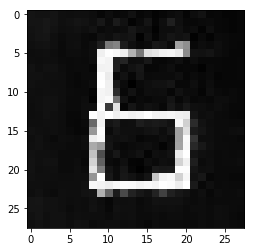

In [265]:
img = generate_test('..//data//mnist//6_written.jpg')

In [266]:
pred = model.predict(img)

In [270]:
np.argmax(pred)

6

In [278]:
pred[0][np.argmax(pred)]

0.45867258